# Import basic rellevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import fraud dataset and Merged

In [2]:
# Настроим в pandas отображение датафреймов без пропусков (в будущем нам будет удобнее визуально смотреть на все столбцы фичей без пропусков)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Импортируем первый датасет
dataset_identity = pd.read_csv("identity_small.csv")
dataset_identity.head()

,TransactionID,id_04,id_20,id_24,id_33,id_29,id_22,id_02
0,2987004,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0
1,2987008,NaN,500.0,NaN,1334x750,NotFound,NaN,98945.0
2,2987010,0.0,142.0,NaN,NaN,Found,NaN,191631.0
3,2987011,NaN,507.0,NaN,NaN,NotFound,NaN,221832.0
4,2987016,0.0,575.0,NaN,1280x800,Found,NaN,7460.0


In [4]:
dataset_identity.isnull().sum()

TransactionID         0
id_04             77909
id_20              4972
id_24            139486
id_33             70944
id_29              3255
id_22            139064
id_02              3361
dtype: int64

In [5]:
dataset_identity.describe(include = "all")

,TransactionID,id_04,id_20,id_24,id_33,id_29,id_22,id_02
count,1.442330e+05,66324.000000,139261.000000,4747.000000,73289,140978,5169.000000,140872.000000
unique,NaN,NaN,NaN,NaN,260,2,NaN,NaN
top,NaN,NaN,NaN,NaN,1920x1080,Found,NaN,NaN
freq,NaN,NaN,NaN,NaN,16874,74926,NaN,NaN
mean,3.236329e+06,-0.058938,403.882666,12.800927,NaN,NaN,16.002708,174716.584708
std,1.788496e+05,0.701015,152.160327,2.372447,NaN,NaN,6.897665,159651.816856
min,2.987004e+06,-28.000000,100.000000,11.000000,NaN,NaN,10.000000,1.000000
25%,3.077142e+06,0.000000,256.000000,11.000000,NaN,NaN,14.000000,67992.000000
50%,3.198818e+06,0.000000,472.000000,11.000000,NaN,NaN,14.000000,125800.500000
75%,3.392923e+06,0.000000,533.000000,15.000000,NaN,NaN,14.000000,228749.000000


In [6]:
# Импортируем второй датасет
dataset_trans = pd.read_csv("trans_small.csv")
dataset_trans.head()

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5
0,2987000,NaN,13926,NaN,150.0,315.0,87.0,68.5,0,1.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,F
1,2987001,0.0,2755,404.0,150.0,325.0,87.0,29.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
2,2987002,0.0,4663,490.0,150.0,330.0,87.0,59.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F
3,2987003,94.0,18132,567.0,150.0,476.0,87.0,50.0,0,25.0,84.0,112.0,94.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
4,2987004,NaN,4497,514.0,150.0,420.0,87.0,50.0,0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN


In [7]:
dataset_trans.isnull().sum()

TransactionID          0
D4                168922
card1                  0
card2               8933
card3               1565
addr1              65706
addr2              65706
TransactionAmt         0
isFraud                0
C13                    0
D10                76022
D1                  1269
D4.1              168922
V225              460110
V277              460110
V243              460110
V40               168969
V46               168969
V244              460110
V274              460110
V73                77096
V147              508595
M5                350482
dtype: int64

In [8]:
dataset_trans.describe(include = "all")

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5
count,5.905400e+05,421618.000000,590540.000000,581607.000000,588975.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,514518.000000,589271.000000,421618.000000,130430.000000,130430.000000,130430.000000,421571.000000,421571.000000,130430.000000,130430.000000,513444.000000,81945.000000,240058
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132491
mean,3.282270e+06,140.002441,9898.734658,362.555488,153.194925,290.733794,86.800630,135.027176,0.034990,32.539918,123.982137,94.347568,140.002441,0.191758,51.956645,1.178387,0.177145,1.022286,1.118562,107.151636,0.139982,0.168601,NaN
std,1.704744e+05,191.096774,4901.170153,157.793246,11.336444,101.741072,2.690623,239.162522,0.183755,129.364844,182.615225,157.660387,191.096774,1.290820,732.145368,1.398953,0.505786,0.166719,0.698807,1258.734139,0.367098,0.750497,NaN
min,2.987000e+06,-122.000000,1000.000000,100.000000,100.000000,100.000000,10.000000,0.251000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.134635e+06,0.000000,6019.000000,214.000000,150.000000,204.000000,87.000000,43.321000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,3.282270e+06,26.000000,9678.000000,361.000000,150.000000,299.000000,87.000000,68.769000,0.000000,3.000000,15.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,3.429904e+06,253.000000,14184.000000,512.000000,150.000000,330.000000,87.000000,125.000000,0.000000,12.000000,197.000000,122.000000,253.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN


In [9]:
# Обьединим оба датасета при помощи Left Join (используем в качестве основной таблицы - таблицу dataset_trans, так как в ней больше данных и присутствуют все строки с данными по TransactionID)
# Таблица dataset_identity гораздо меньше и в ней не полный обьем данных по всем транзакциям
# Обьединение выполним по ключу - столбец TransactionID
merged_dataset = pd.merge(left=dataset_trans, right=dataset_identity, how='left', left_on='TransactionID', right_on='TransactionID')
merged_dataset.head()

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5,id_04,id_20,id_24,id_33,id_29,id_22,id_02
0,2987000,NaN,13926,NaN,150.0,315.0,87.0,68.5,0,1.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,2755,404.0,150.0,325.0,87.0,29.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,4663,490.0,150.0,330.0,87.0,59.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,94.0,18132,567.0,150.0,476.0,87.0,50.0,0,25.0,84.0,112.0,94.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,NaN,4497,514.0,150.0,420.0,87.0,50.0,0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0


In [10]:
# Начнем изучать наш итоговый датасет
merged_dataset.describe(include = "all")
# Сопоставим первую строку статистики (count) со статистикой таблицы dataset_identity, чтобы убедиться, что мы не потеряли данные во время обьединения
# Все переменные из dataset_identity совпадают по количеству данных. Все хорошо
# Категориальные переменные - M5, id_29, id_33

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5,id_04,id_20,id_24,id_33,id_29,id_22,id_02
count,5.905400e+05,421618.000000,590540.000000,581607.000000,588975.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,514518.000000,589271.000000,421618.000000,130430.000000,130430.000000,130430.000000,421571.000000,421571.000000,130430.000000,130430.000000,513444.000000,81945.000000,240058,66324.000000,139261.000000,4747.000000,73289,140978,5169.000000,140872.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,260,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,1920x1080,Found,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132491,NaN,NaN,NaN,16874,74926,NaN,NaN
mean,3.282270e+06,140.002441,9898.734658,362.555488,153.194925,290.733794,86.800630,135.027176,0.034990,32.539918,123.982137,94.347568,140.002441,0.191758,51.956645,1.178387,0.177145,1.022286,1.118562,107.151636,0.139982,0.168601,NaN,-0.058938,403.882666,12.800927,NaN,NaN,16.002708,174716.584708
std,1.704744e+05,191.096774,4901.170153,157.793246,11.336444,101.741072,2.690623,239.162522,0.183755,129.364844,182.615225,157.660387,191.096774,1.290820,732.145368,1.398953,0.505786,0.166719,0.698807,1258.734139,0.367098,0.750497,NaN,0.701015,152.160327,2.372447,NaN,NaN,6.897665,159651.816856
min,2.987000e+06,-122.000000,1000.000000,100.000000,100.000000,100.000000,10.000000,0.251000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-28.000000,100.000000,11.000000,NaN,NaN,10.000000,1.000000
25%,3.134635e+06,0.000000,6019.000000,214.000000,150.000000,204.000000,87.000000,43.321000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,256.000000,11.000000,NaN,NaN,14.000000,67992.000000
50%,3.282270e+06,26.000000,9678.000000,361.000000,150.000000,299.000000,87.000000,68.769000,0.000000,3.000000,15.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,472.000000,11.000000,NaN,NaN,14.000000,125800.500000
75%,3.429904e+06,253.000000,14184.000000,512.000000,150.000000,330.000000,87.000000,125.000000,0.000000,12.000000,197.000000,122.000000,253.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,533.000000,15.000000,NaN,NaN,14.000000,228749.000000


In [11]:
# Посмотрим на пустые значения в нашей таблице. Их гораздо больше, если сравнивать с предыдущими домашними заданиями
# Будем придумывать, что с этим делать
merged_dataset.isnull().sum()

TransactionID          0
D4                168922
card1                  0
card2               8933
card3               1565
addr1              65706
addr2              65706
TransactionAmt         0
isFraud                0
C13                    0
D10                76022
D1                  1269
D4.1              168922
V225              460110
V277              460110
V243              460110
V40               168969
V46               168969
V244              460110
V274              460110
V73                77096
V147              508595
M5                350482
id_04             524216
id_20             451279
id_24             585793
id_33             517251
id_29             449562
id_22             585371
id_02             449668
dtype: int64

In [12]:
# Изменим порядок столбцов, чтобы таргет у нас был первым столбцом, а фичи последующими 
# плюс отсортируем по порядку некоторые колонки, и сначала пусть у нас идут числовые переменные, а потом категориальные
merged_dataset.columns.values

array(['TransactionID', 'D4', 'card1', 'card2', 'card3', 'addr1', 'addr2',
       'TransactionAmt', 'isFraud', 'C13', 'D10', 'D1', 'D4.1', 'V225',
       'V277', 'V243', 'V40', 'V46', 'V244', 'V274', 'V73', 'V147', 'M5',
       'id_04', 'id_20', 'id_24', 'id_33', 'id_29', 'id_22', 'id_02'],
      dtype=object)

In [13]:
cols = ['isFraud', 'TransactionID', 'card1', 'card2', 'card3', 'addr1', 'addr2', 'TransactionAmt', 'C13', 
        'D1', 'D4', 'D4.1', 'D10', 'V40', 'V46', 'V73', 'V147', 'V225', 'V243', 'V244', 'V274', 'V277',
       'id_02', 'id_04', 'id_20', 'id_22', 'id_24', 'M5', 'id_29', 'id_33']

In [14]:
dataset_final = merged_dataset[cols]
dataset_final.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D4.1,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33
0,0,2987000,13926,NaN,150.0,315.0,87.0,68.5,1.0,14.0,NaN,NaN,13.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
1,0,2987001,2755,404.0,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
2,0,2987002,4663,490.0,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
3,0,2987003,18132,567.0,150.0,476.0,87.0,50.0,25.0,112.0,94.0,94.0,84.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
4,0,2987004,4497,514.0,150.0,420.0,87.0,50.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,70787.0,NaN,144.0,NaN,NaN,NaN,NotFound,2220x1080


# Preprocessing

<AxesSubplot:>

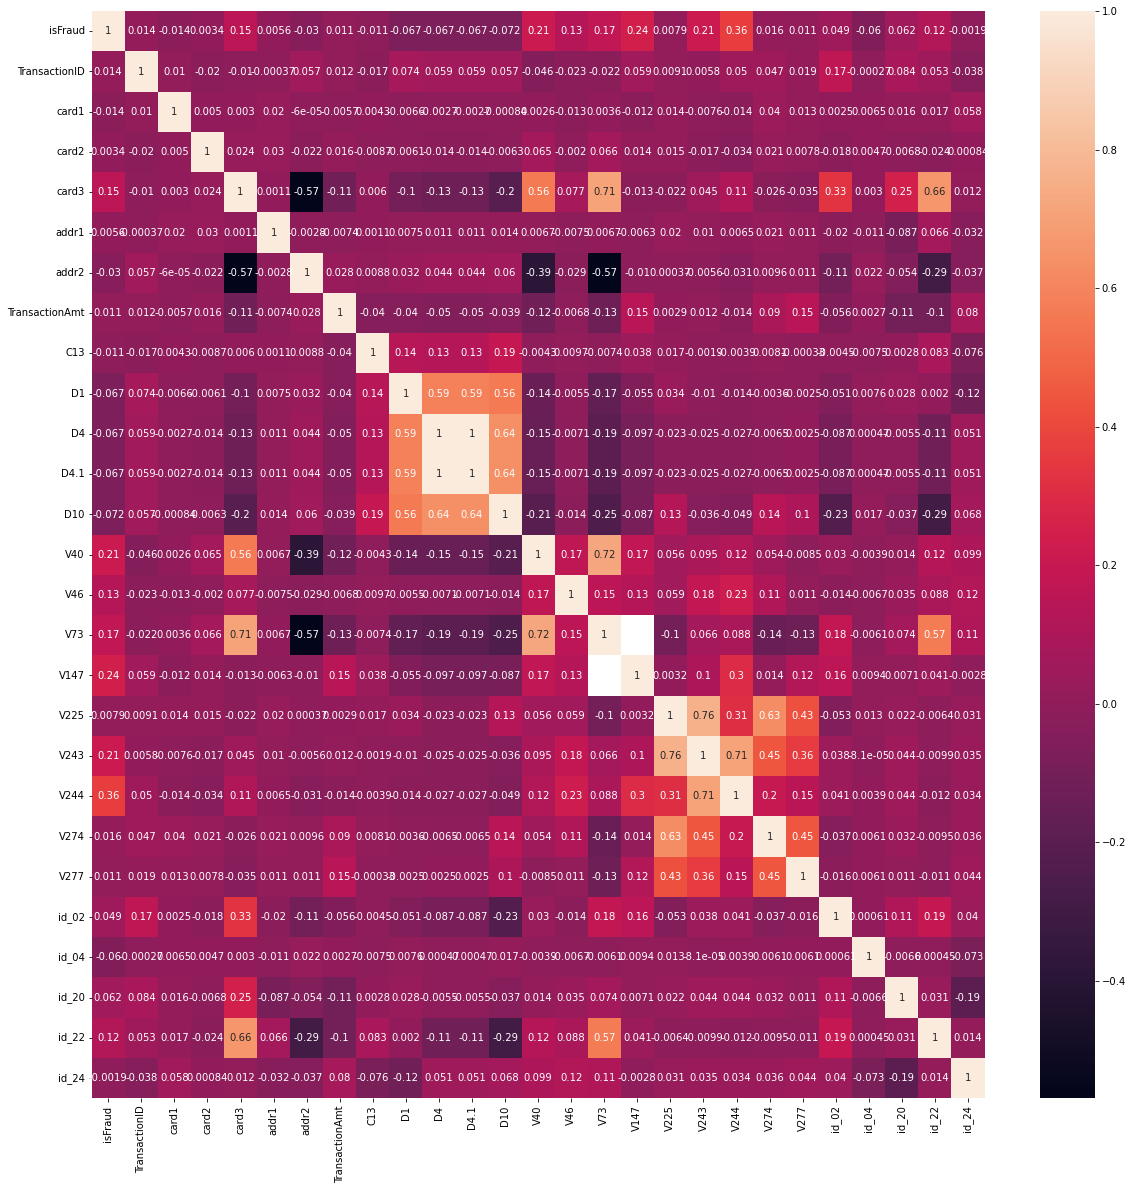

In [15]:
# Для начала посмотрим на нашу матрицу корреляций (скорректируем размер матрицы, чтобы были лучше видны корреляционные коэффициенты)
plt.figure(figsize=(20, 20))
sns.heatmap(dataset_final.corr(), annot=True)

In [16]:
# Выводы по матрице корреляций (самые большие связи корреляционные связи между переменными - приблизительно в районе минимум 0.7)
# 0.71 - между card3 и V73
# 0.66 - между card3 и id_22
# 0.72 - между V40 и V73
# 0.64 - между D4 и D10
# 0.76 - между V225 и V243
# 0.63 - между V225 и V274
# 0.71 - между  V243 и V244
# Пока что оставим эти переменные. Думаю стоит построить базовую модель со всеми переменными. 
# А после этого, думаю можно будет посмотреть как изменится наша точность, если некоторые особо коррелирующие переменные убрать, ну или выполнить другие коррекции

In [17]:
# Посмотрим на баланс наших классов в isFraud
dataset_final['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [18]:
# Мы наблюдаем очень большой дисбаланс классов:
# класс 0 - 96.5%, класс 1 - 3.5%
# большинство банковских операций нормальные, и только 3,5% мошенические
# после построения базовой модели вернемся к вопросу балансировки классов

<AxesSubplot:xlabel='D1', ylabel='Count'>

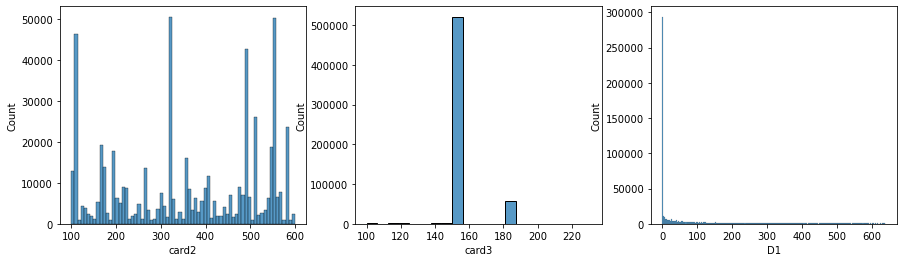

In [19]:
# Обработаем пустые значения в нашем датасете
# Начнем с переменных card2, card3, D1, D10, addr1, addr2, V73 (у этих переменных найменьшее количество пустых значений)
# Также посмотрим на распределние переменных, это поможет нам в принятии решения по замене этих пустых значений
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(dataset_final['card2'], ax=ax1)
sns.histplot(dataset_final['card3'], ax=ax2)
sns.histplot(dataset_final['D1'], ax=ax3)
# Выводы по замене пустых значений по каждой перменной:
# card2 - используем среднее значение
# card3 - используем моду
# D1 - используем моду

<AxesSubplot:xlabel='V73', ylabel='Count'>

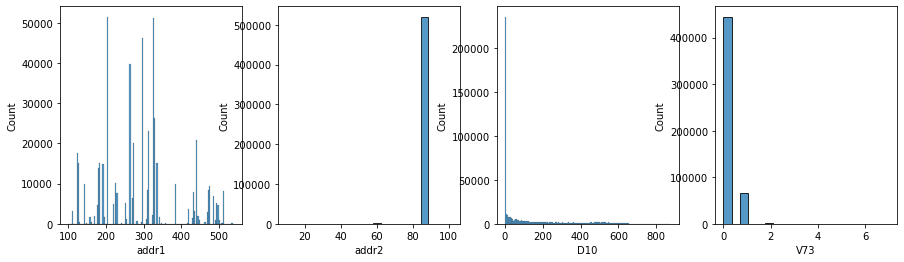

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(dataset_final['addr1'], ax=ax1)
sns.histplot(dataset_final['addr2'], ax=ax2)
sns.histplot(dataset_final['D10'], ax=ax3)
sns.histplot(dataset_final['V73'], ax=ax4)
# Выводы по замене пустых значений по каждой перменной:
# addr1 - используем среднее значение
# addr2 - используем моду
# D10 - используем моду
# V73 - используем моду

In [21]:
# по переменной card2 у нас 8933 пустых значений из 590539 (около 1.5%)
# по переменной card3 у нас 1565 пустых значений из 590539 (около 0.3%)
# по переменной D1 у нас 1269 пустых значений из 590539 (около 0.2%)

# по переменной addr1 у нас 65706 пустых значений из 590539 (около 11.1%)
# по переменной addr2 у нас 65706 пустых значений из 590539 (около 11.1%)
# по переменной D10 у нас 76022 пустых значений из 590539 (около 12.9%)
# по переменной V73 у нас 77096 пустых значений из 590539 (около 13.1%)

# Выполним замены пустых значений исходя из выводов выше по каждой переменной 
# из-за малого или не высокого количества пустых значений потеря предсказательной силы должна быть допустимой
modes = dataset_final.mode()

dataset_final_1 = dataset_final.fillna(value = {"card2": dataset_final["card2"].mean(), 
                                                "card3": modes.iloc[0,4], 
                                                "D1": modes.iloc[0,9], 
                                                "addr1": dataset_final["addr1"].mean(), 
                                                "addr2": modes.iloc[0,6], 
                                                "D10": modes.iloc[0,12], 
                                                "V73": modes.iloc[0,15]})

In [22]:
dataset_final_1.isnull().sum()

isFraud                0
TransactionID          0
card1                  0
card2                  0
card3                  0
addr1                  0
addr2                  0
TransactionAmt         0
C13                    0
D1                     0
D4                168922
D4.1              168922
D10                    0
V40               168969
V46               168969
V73                    0
V147              508595
V225              460110
V243              460110
V244              460110
V274              460110
V277              460110
id_02             449668
id_04             524216
id_20             451279
id_22             585371
id_24             585793
M5                350482
id_29             449562
id_33             517251
dtype: int64

In [23]:
dataset_final_1.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D4.1,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33
0,0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,NaN,NaN,13.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
1,0,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
2,0,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
3,0,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,94.0,84.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
4,0,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70787.0,NaN,144.0,NaN,NaN,NaN,NotFound,2220x1080


<AxesSubplot:xlabel='V46', ylabel='Count'>

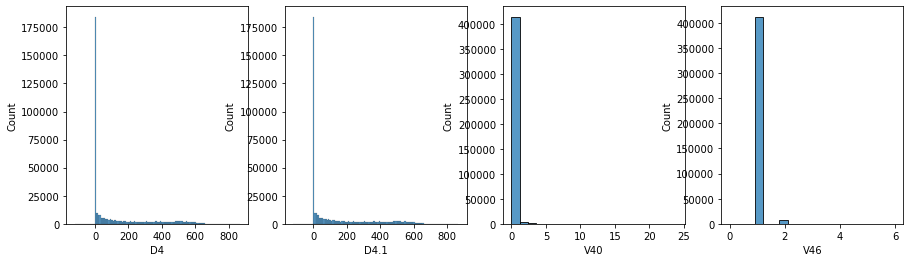

In [24]:
# Посмотрим на столбцы, у которых больше пустых значений чем 13%, но не больше чем 50%
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(dataset_final_1['D4'], ax=ax1) # 29% пустых значений
sns.histplot(dataset_final_1['D4.1'], ax=ax2) # 29% пустых значений
sns.histplot(dataset_final_1['V40'], ax=ax3) # 29% пустых значений
sns.histplot(dataset_final_1['V46'], ax=ax4) # 29% пустых значений
# Думаю с ними, я сделаю трансформации также, как в предыдущем случае, а вот с теми переменными, которые останутся, надо будет подумать, что делать
# Выводы по замене пустых значений по каждой перменной:
# D4 - используем моду
# D4.1 - используем моду
# V40 - используем моду
# V46 - используем моду

In [25]:
dataset_final_2 = dataset_final_1.fillna(value = {"D4": modes.iloc[0,10], 
                                                "D4.1": modes.iloc[0,11], 
                                                "V40": modes.iloc[0,13], 
                                                "V46": modes.iloc[0,14]})

In [26]:
dataset_final_2.isnull().sum()

isFraud                0
TransactionID          0
card1                  0
card2                  0
card3                  0
addr1                  0
addr2                  0
TransactionAmt         0
C13                    0
D1                     0
D4                     0
D4.1                   0
D10                    0
V40                    0
V46                    0
V73                    0
V147              508595
V225              460110
V243              460110
V244              460110
V274              460110
V277              460110
id_02             449668
id_04             524216
id_20             451279
id_22             585371
id_24             585793
M5                350482
id_29             449562
id_33             517251
dtype: int64

<AxesSubplot:xlabel='V277', ylabel='Count'>

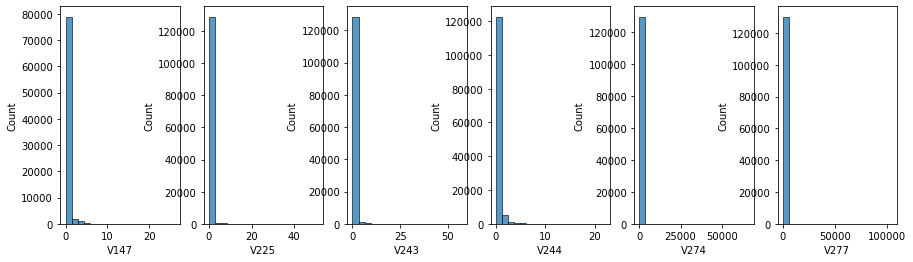

In [27]:
# Остались столбцы, у которых гораздо больше 50% - это пустые значения
# Прийму решение заменить эти все пустые значения на 0, чтобы возможно хотя бы как-то поможет нам обработать пустоту, но не выкидывать эти переменные пока что до построения базовой модели
# Также посмотрим для перестраховки на распределения этих переменных
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(15, 4))
sns.histplot(dataset_final_2['V147'], ax=ax1)
sns.histplot(dataset_final_2['V225'], ax=ax2)
sns.histplot(dataset_final_2['V243'], ax=ax3)
sns.histplot(dataset_final_2['V244'], ax=ax4)
sns.histplot(dataset_final_2['V274'], ax=ax5)
sns.histplot(dataset_final_2['V277'], ax=ax6)
# Замена на 0 будет оптимальной для всех этих переменных, так как из известных значений, мода также 0 везде

<AxesSubplot:xlabel='id_24', ylabel='Count'>

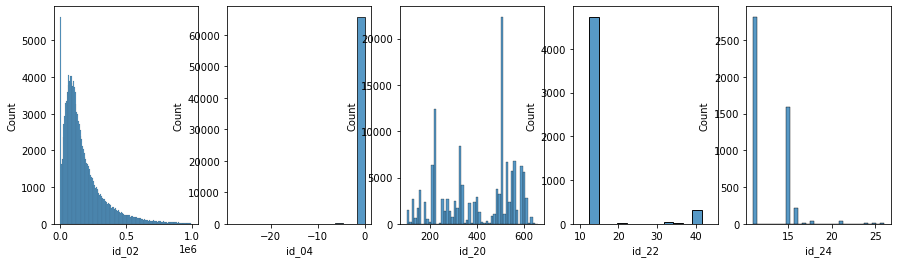

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 4))
sns.histplot(dataset_final_2['id_02'], ax=ax1)
sns.histplot(dataset_final_2['id_04'], ax=ax2)
sns.histplot(dataset_final_2['id_20'], ax=ax3)
sns.histplot(dataset_final_2['id_22'], ax=ax4)
sns.histplot(dataset_final_2['id_24'], ax=ax5)
# По этим же перменным не все так однозначно - замену на 0 сделаем в id_04, а в других попробуем замену на среднее значение (понимаю что грубый рассчет, но честно не знаю что еще можно сделать с таким количеством пропусков)
# Предполагаю, что есть высокая вероятность, что после построения базовой модели эти переменные будут не значимы

In [29]:
# Выпоняем финальные корректировки по замене пустых значений
dataset_final_3 = dataset_final_2.fillna(value = {"V147": 0, 
                                                "V225": 0, 
                                                "V243": 0,
                                                "V244": 0,
                                                "V274": 0,
                                                "V277": 0, 
                                                "id_02": dataset_final["id_02"].mean(), 
                                                "id_04": 0, 
                                                "id_20": dataset_final["id_20"].mean(),
                                                "id_22": dataset_final["id_22"].mean(), 
                                                "id_24": dataset_final["id_24"].mean()})

In [30]:
dataset_final_3.isnull().sum()
# Все пустые значения из числовых переменных убраны, остались только категориальные

isFraud                0
TransactionID          0
card1                  0
card2                  0
card3                  0
addr1                  0
addr2                  0
TransactionAmt         0
C13                    0
D1                     0
D4                     0
D4.1                   0
D10                    0
V40                    0
V46                    0
V73                    0
V147                   0
V225                   0
V243                   0
V244                   0
V274                   0
V277                   0
id_02                  0
id_04                  0
id_20                  0
id_22                  0
id_24                  0
M5                350482
id_29             449562
id_33             517251
dtype: int64

In [31]:
# Проанализируем категориальную переменную M5
pd.unique(dataset_final_3['M5'])

array(['F', 'T', nan], dtype=object)

<AxesSubplot:xlabel='M5', ylabel='Count'>

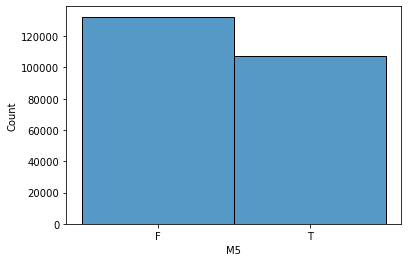

In [32]:
sns.histplot(dataset_final_3['M5'])
# Категории достаточно сбалансированы. однако 350482 пустых значений, это слишком много
# Предлагаю все пустые значения закинуть в новую отдельную третью категорию - "No" (возможно отсутствие информации в этой категории также несет какой то предсказательный смысл)

<AxesSubplot:xlabel='M5', ylabel='Count'>

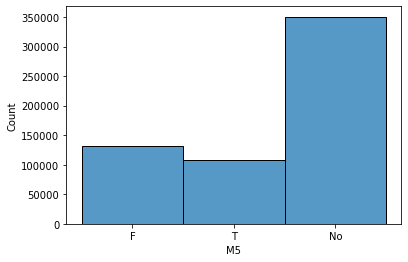

In [33]:
dataset_final_4 = dataset_final_3.fillna(value = {"M5" : "No"})
sns.histplot(dataset_final_4['M5'])

In [34]:
# Проанализируем категориальную переменную id_29
pd.unique(dataset_final_4['id_29'])

array([nan, 'NotFound', 'Found'], dtype=object)

<AxesSubplot:xlabel='id_29', ylabel='Count'>

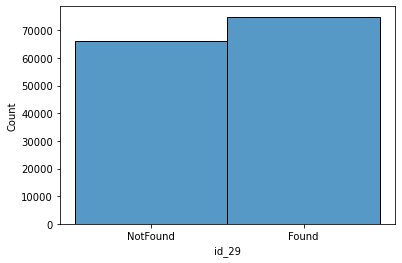

In [35]:
sns.histplot(dataset_final_4['id_29'])
# Также создадим отдельную переменную "No" по аналогии выше

In [36]:
dataset_final_5 = dataset_final_4.fillna(value = {"id_29" : "No"})

In [37]:
# Проанализируем категориальную переменную id_33
# Есть два варианта - первый - выбросить эту переменную так как очень много уникальных значений и очень много пустых значений
# Второй вариант - превратить ее в числовую перменную, извлекая первые 4 цифры. Выберем второй вариант, чтобы все же сохранить данные по максимуму

In [38]:
dataset_final_5['id_33_Correct'] = dataset_final_5['id_33'].str[0:4]
dataset_final_5.head(10)

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D4.1,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33,id_33_Correct
0,0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,F,No,NaN,NaN
1,0,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,T,No,NaN,NaN
2,0,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,F,No,NaN,NaN
3,0,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,94.0,84.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,T,No,NaN,NaN
4,0,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70787.000000,0.0,144.000000,16.002708,12.800927,No,NotFound,2220x1080,2220
5,0,2987005,5937,555.000000,150.0,272.0,87.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,F,No,NaN,NaN
6,0,2987006,12308,360.000000,150.0,126.0,87.0,159.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,F,No,NaN,NaN
7,0,2987007,12695,490.000000,150.0,325.0,87.0,422.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,F,No,NaN,NaN
8,0,2987008,2803,100.000000,150.0,337.0,87.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,98945.000000,0.0,500.000000,16.002708,12.800927,No,NotFound,1334x750,1334
9,0,2987009,17399,111.000000,150.0,204.0,87.0,117.0,12.0,61.0,318.0,318.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,T,No,NaN,NaN


In [39]:
pd.unique(dataset_final_5['id_33_Correct'])
# как видим у нас есть ошибки, где размерность была не в четырех цифрах
# ошибок у нас не много, поэтому вручную исправим их
# '0x0' исправим на 0

array([nan, '2220', '1334', '1280', '1366', '1920', '1680', '1136',
       '5120', '2880', '2560', '2048', '1024', '2208', '2001', '1440',
       '1600', '2672', '960x', '2732', '2436', '2960', '855x', '4096',
       '2160', '2562', '801x', '2736', '3441', '3840', '1638', '1360',
       '3440', '1152', '3360', '2304', '3200', '2112', '2224', '2400',
       '2000', '1728', '3000', '1400', '3201', '1356', '1344', '1624',
       '1536', '1800', '2961', '1200', '1480', '1281', '1776', '2049',
       '1138', '0x0', '2520', '5760', '3843', '1184', '2076', '1093',
       '2392', '2735', '1805', '2816', '4500', '1684', '1364', '3072',
       '5040', '7500', '768x', '1768', '1658', '1239', '1188', '1232',
       '1264', '3240', '1422', '1848', '2010', '1512', '1296', '1368',
       '3520', '800x', '1700', '6400', '2368', '1824', '1912', '600x',
       '1760', '2700', '1371', '2552', '3600', '6016', '1720', '1408',
       '640x', '976x', '1062', '2800', '6720', '1120', '1921', '1279',
       '14

In [40]:
dataset_final_5["id_33_Correct"].replace({"960x": "960", "855x": "855", "801x": "801", "0x0": "0", "768x": "768", 
                                          "800x": "800", "600x": "600", "640x": "640", "976x": "976", "921x": "921", "480x": "480"}, inplace=True)

In [41]:
pd.unique(dataset_final_5['id_33_Correct'])

array([nan, '2220', '1334', '1280', '1366', '1920', '1680', '1136',
       '5120', '2880', '2560', '2048', '1024', '2208', '2001', '1440',
       '1600', '2672', '960', '2732', '2436', '2960', '855', '4096',
       '2160', '2562', '801', '2736', '3441', '3840', '1638', '1360',
       '3440', '1152', '3360', '2304', '3200', '2112', '2224', '2400',
       '2000', '1728', '3000', '1400', '3201', '1356', '1344', '1624',
       '1536', '1800', '2961', '1200', '1480', '1281', '1776', '2049',
       '1138', '0', '2520', '5760', '3843', '1184', '2076', '1093',
       '2392', '2735', '1805', '2816', '4500', '1684', '1364', '3072',
       '5040', '7500', '768', '1768', '1658', '1239', '1188', '1232',
       '1264', '3240', '1422', '1848', '2010', '1512', '1296', '1368',
       '3520', '800', '1700', '6400', '2368', '1824', '1912', '600',
       '1760', '2700', '1371', '2552', '3600', '6016', '1720', '1408',
       '640', '976', '1062', '2800', '6720', '1120', '1921', '1279',
       '1441', '1679

<AxesSubplot:xlabel='id_33_Correct', ylabel='Count'>

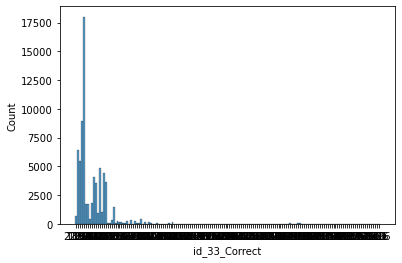

In [42]:
sns.histplot(dataset_final_5['id_33_Correct'])
# Заменим пустые значения на средние

In [43]:
dataset_final_5["id_33_Correct"] = pd.to_numeric(dataset_final_5["id_33_Correct"])

In [44]:
dataset_final_6 = dataset_final_5.fillna(value = {"id_33_Correct": dataset_final_5["id_33_Correct"].mean()})

In [45]:
# Удалим из модели столбец id_33, он больше не нужен
# Также удалим столбец TransactionID, так как он никакого смысла не несет
model_polufinal = dataset_final_6.drop(['TransactionID', 'id_33'], axis = 1)

In [46]:
model_polufinal.isnull().sum()
# Теперь у нас нет пустых значений ни в числовых, ни в категориальных переменных

isFraud           0
card1             0
card2             0
card3             0
addr1             0
addr2             0
TransactionAmt    0
C13               0
D1                0
D4                0
D4.1              0
D10               0
V40               0
V46               0
V73               0
V147              0
V225              0
V243              0
V244              0
V274              0
V277              0
id_02             0
id_04             0
id_20             0
id_22             0
id_24             0
M5                0
id_29             0
id_33_Correct     0
dtype: int64

In [47]:
# Трансформируем наши категориальные переменные при помощи метода One Hot Encoding. Также не забываем уберать первое наименование, чтобы избежать мультиколлинераности
model_final = pd.get_dummies(model_polufinal, drop_first=True)
model_final.head()

,isFraud,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D4.1,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
0,0,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
1,0,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
2,0,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
3,0,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,94.0,84.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
4,0,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70787.000000,0.0,144.000000,16.002708,12.800927,2220.000000,1,0,0,1


In [48]:
# Процес предобработки данных завершен.

# Feature Scalling & Baseline model (logistic regression)

In [49]:
# Создадим нашу матрицу фичей и зависимый вектор
X = model_final.drop(['isFraud'], axis=1)
y = model_final['isFraud']

In [50]:
X.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D4.1,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
0,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
1,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
2,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
3,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,94.0,84.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174716.584708,0.0,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
4,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,70787.000000,0.0,144.000000,16.002708,12.800927,2220.000000,1,0,0,1


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [52]:
# Разделим наши данные на тренировочные и тестовые. В разделении используем параметр stratify
# При помощи его данные разделяются стратифицированным образом, используя это в качестве меток классов
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [53]:
# Выполним feature scalling наших фичей
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train

array([[-0.75999811,  0.23292389, -0.28177032, ..., -0.47225374,
        -1.78266467, -0.35528455],
       [-0.40855769, -0.11193629, -0.28177032, ...,  2.11750573,
         0.560958  , -0.35528455],
       [ 0.36448885, -1.60633042, -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455],
       ...,
       [-0.11586065,  0.0668801 , -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455],
       [-1.37659961,  0.29040059,  2.80478103, ..., -0.47225374,
        -1.78266467, -0.35528455],
       [-1.11307029,  1.22918665, -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455]])

In [55]:
X_test

array([[-0.47280826,  1.21641405, -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455],
       [-1.37659961,  0.29040059,  2.80478103, ..., -0.47225374,
        -1.78266467,  2.81464536],
       [ 0.03140574, -0.87829225, -0.28177032, ...,  2.11750573,
         0.560958  , -0.35528455],
       ...,
       [-0.18378268,  0.57778408, -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455],
       [-0.76061002,  0.81407717, -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455],
       [ 1.21422813,  0.1754472 , -0.28177032, ..., -0.47225374,
         0.560958  , -0.35528455]])

In [56]:
# Сделаем baseline model (нашу стартовую модель, которую будем брать за основу для дальнейших изучений и улучшений)
# Используем логистическую регрессию в качестве baseline model (запустим ее с коробки без подборки лучших гипперпараметров)
from sklearn.linear_model import LogisticRegression
classifier_baseline = LogisticRegression(random_state = 42)
classifier_baseline.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
y_pred_baseline = classifier_baseline.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)
accuracy_score(y_test, y_pred_baseline)

[[113860    115]
 [  3649    484]]


0.968130863277678

In [59]:
roc_auc_score(y_test, y_pred_baseline)

0.5580486125215717

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113975
           1       0.81      0.12      0.20      4133

    accuracy                           0.97    118108
   macro avg       0.89      0.56      0.59    118108
weighted avg       0.96      0.97      0.96    118108



In [61]:
# Точность нашей модели составляет 97%, но из-за имбаланса классов наша модель хорошо предсказывает класс 0, но очень плохо предсказывает класс 1
# Из 4133 мошеннических банковских операций у нас только 484 операции предсказаны правильно, что составляет всего 12% точности
# Метрика ROC AUC намного эффективнее подходит нам для понимания, эффективна ли наша модель или нет, AUC = 55.8% (наши результаты)
# Main advantage ROC AUC compare with accuracy - Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1 (эффективность в разрезе классов, что на имбалансном датасете сверх полезная метрика)

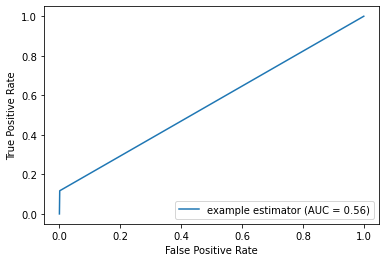

In [62]:
# Визуализируем наш полученый roc_auc 
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_baseline)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [63]:
# Также давайте посмотрим на значимость фичей для базовой модели (это будет весьма важной информацией для будущих корректировок)

In [64]:
# Построим на таблицу с коэффициентами, чтобы изучить, какие факторы более значимы, какие менее
pd.DataFrame(classifier_baseline.coef_.reshape(-1,1), X.columns, columns = ['Coefficients']).sort_values('Coefficients', ascending=False)

,Coefficients
V243,0.458533
V244,0.339006
card3,0.293943
TransactionAmt,0.190652
V147,0.149076
M5_T,0.147154
V40,0.118909
V46,0.111092
id_20,0.055510
addr1,0.045474


In [65]:
# Попробуем выкинуть из модели фичи, у которых коэффициенты например, меньше по модулю 0.07 (значение выбрал субьективно)
# Итого, это - id_20, addr1, id_22, V73, C13, id_24, addr2, card2, id_02, V274, id_04, D10, card1, D4.1, D4
# Убрав из модели эти фичи, в будущих моделях намного улучшилась производительность (первоначально не убирая фичи, производительность была не высокой)
model_final_with_significance_features = model_final.drop(['id_20', 'addr1', 'id_22', 'V73', 'C13', 'id_24', 'addr2', 'card2', 'id_02', 'V274', 'id_04', 'D10', 'card1', 'D4.1', 'D4'], axis = 1)
model_final_with_significance_features.head()

,isFraud,card3,TransactionAmt,D1,V40,V46,V147,V225,V243,V244,V277,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
0,0,150.0,68.5,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1820.408001,0,0,1,0
1,0,150.0,29.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1820.408001,0,1,1,0
2,0,150.0,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1820.408001,0,0,1,0
3,0,150.0,50.0,112.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1820.408001,0,1,1,0
4,0,150.0,50.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2220.000000,1,0,0,1


# Logistic Regression with GridSearch with most significance features

In [66]:
# Для начала разделим наш обновленный датасет на матрицу фичей и зависимый вектор, сделаем трейн-тест сплит и feature scalling
X2 = model_final_with_significance_features.drop(['isFraud'], axis=1)
y2 = model_final_with_significance_features['isFraud']

In [67]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42, stratify = y)

In [68]:
sc2 = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [69]:
# Построим логистическую регрессию при помощи GridSearch для подбора гипперпараметров и посмотрим на изменения в качестве нашей модели
# Особое внимание обратим на параметр class_weight - выберем balanced
from sklearn.model_selection import GridSearchCV
tuned_parameters1 = [
    {"solver": ["newton-cg"], "penalty": ["l2", "none"], "C": [1, 10, 100], "class_weight": ["balanced"], "max_iter": [100, 1000], "random_state": [42]},
    {"solver": ["lbfgs"], "penalty": ["l2", "none"], "C": [1, 10, 100], "class_weight": ["balanced"], "max_iter": [100, 1000], "random_state": [42]},
    {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": [1, 10, 100], "class_weight": ["balanced"], "max_iter": [100, 1000], "random_state": [42]},
    {"solver": ["sag"], "penalty": ["l2", "none"], "C": [1, 10, 100], "class_weight": ["balanced"], "max_iter": [100, 1000], "random_state": [42]}, 
    {"solver": ["saga"], "penalty": ["elasticnet", "l1", "l2", "none"], "C": [1, 10, 100], "class_weight": ["balanced"], "max_iter": [100, 1000], "random_state": [42]}]

scores = ["accuracy", "roc_auc"]

for score in scores:
    clf = GridSearchCV(LogisticRegression(), tuned_parameters1, scoring=score, cv = 3, n_jobs = -1, verbose = 2)
    clf.fit(X_train2, y_train2)

    print("Best parameters set found on development set:", score)
    print(clf.best_params_)
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test2, clf.predict(X_test2)
    print(classification_report(y_true, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\93ttt\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71237131 0.7123692  0.71237131 0.7123692  0.7123692  0.7123692
 0.7123692  0.7123692  0.7123692  0.7123692  0.7123692  0.7123692
 0.71236708 0.71236708 0.71236708 0.71236708 0.71236708 0.71236708
 0.71236708 0.71236708 0.71236708 0.71236708 0.71236708 0.71236708
 0.71237131 0.71236708 0.71237131 0.71236708 0.71237131 0.7123692
 0.71237131 0.7123692  0.7123692  0.7123692  0.7123692  0.7123692
 0.71236285 0.71236285 0.71236285 0.71236285 0.71236285 0.71236285
 0.71236285 0.71236285 0.71236285 0.71236285 0.71236285 0.71236285
        nan 0.71237343 0.7123692  0.71236708        nan 0.71237343
 0.7123692  0.71236708        nan 0.7123692  0.71236708 0.71236708
        nan 0.7123692  0.71236708 0.71236708        nan 0.71236708
 0.71236708 0.71236708        nan 0.71236708 0.71236708 0.71236708]
  warnings.warn(


Best parameters set found on development set: accuracy
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.98      0.72      0.83    113975
           1       0.08      0.68      0.15      4133

    accuracy                           0.72    118108
   macro avg       0.53      0.70      0.49    118108
weighted avg       0.95      0.72      0.81    118108

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\93ttt\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.77935299 0.77935296 0.77935299 0.77935296 0.77935293 0.77935296
 0.77935293 0.77935296 0.77935297 0.77935296 0.77935297 0.77935296
 0.77935355 0.77935341 0.77935355 0.77935341 0.77935345 0.77935341
 0.77935345 0.77935341 0.77935341 0.77935341 0.77935341 0.77935341
 0.77935383 0.77935293 0.77935383 0.77935293 0.77935301 0.77935293
 0.77935301 0.77935293 0.77935295 0.77935293 0.77935295 0.77935293
 0.7793523  0.77935256 0.7793523  0.77935256 0.77935252 0.77935256
 0.77935252 0.77935256 0.77935255 0.77935256 0.77935255 0.77935256
        nan 0.77935315 0.77935232 0.77935225        nan 0.77935315
 0.77935232 0.77935225        nan 0.77935228 0.77935215 0.77935225
        nan 0.77935228 0.77935215 0.77935225        nan 0.77935224
 0.77935225 0.77935225        nan 0.77935224 0.77935225 0.77935225]
  warnings.warn(


Best parameters set found on development set: roc_auc
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.98      0.72      0.83    113975
           1       0.08      0.68      0.15      4133

    accuracy                           0.72    118108
   macro avg       0.53      0.70      0.49    118108
weighted avg       0.95      0.72      0.81    118108



In [70]:
# Оптимальные гипперпараметры для нашей модели логистической регрессии:
# Для Accuracy - {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
# Для AUC - {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
# Для модели выберем параметры с метрикой AUC, так как она лучше подходит для несбалансированного датасета (как было указано выше)

In [71]:
# Построим логистическую регрессию с выбранными оптимальными гиппепараметрами
classifier_Logistic_Grid = LogisticRegression(solver = "liblinear", penalty = "l1", C = 1, class_weight = "balanced", max_iter = 100, random_state = 42)
classifier_Logistic_Grid.fit(X_train2, y_train2)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

In [72]:
y_pred_Logistic_Grid = classifier_Logistic_Grid.predict(X_test2)

In [73]:
cm_Logistic_Grid = confusion_matrix(y_test2, y_pred_Logistic_Grid)
print(cm_Logistic_Grid)
roc_auc_score(y_test2, y_pred_Logistic_Grid)

[[82011 31964]
 [ 1302  2831]]


0.7022635640878496

In [74]:
# Общая точность нашей модели значительно уменьшилась и соcтавила около 72%, однако мы наблюдаем заметное улучшение предсказаний класса 1, где банковские опперации есть мошенническими
# AUC у нас вырос с 55.8% до 70.2%, что очень хорошо
# Наша модель определенно стала лучше работать
# Из 4133 мошеннических банковских операций у нас 2831 операция предсказана правильно, что составляет уже 68% точности (было 12%)

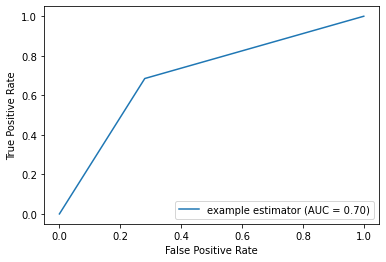

In [75]:
# Визуализируем новый ROC_AUC
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_Logistic_Grid)
roc_auc2 = auc(fpr2, tpr2)
display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2,
                                  estimator_name='example estimator')
display2.plot()

plt.show()

# KNN Classification Model

In [76]:
# Первоначально я пытался построить класическую модель KNN с коробки на нашем датасете, также при помощи метода GridSearch пытался подбирать параметры
# Однако, сколько бы раз, я не запускал модель, время на ее обработку было огромное (ни один из разов я не дождался output)
# Один раз, ждал около часа, но модель все равно не обрабатывалась до конца
# Итого я предполагаю, что этот алгоритм просто не подходит для нашего несбалансированного датасета и он требует огромного количество ресурсов, хотя по природе своей, алгоритм KNN очень простой
# Чтобы убедиться в этом, и все таки воспользоваться этим алгоритмом в нашей задачи, я его использую после корректировки классов при помощи метода random undersampling

In [77]:
# Сделаем Random Undersampling на нашем датасете
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X2, y2)
# В последующих моделях думаю вернусь к этому пункуту, - особое внимание стоит обратить на sampling_strategy (тут можно выбирать определенные числовые соотношения для балансировки наших классов)
# Основная цель на данном этапе - запустить KNN алгоритм на нашем датасете, 50 на 50 распределение классов не хочу брать, возьму 67 на 33, чтобы было более ближе к реальности

In [78]:
y_under.sum()

20663

In [79]:
y_under.shape

(61989,)

In [80]:
X_under.shape

(61989, 15)

In [81]:
# Итого наш датасет сбалансирован 67 на 33. Посмотрим, как это отразится на нашей модели KNN, и запуститься ли она теперь?

In [82]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)

In [83]:
sc3 = StandardScaler()
X_train_under = sc.fit_transform(X_train_under)
X_test_under = sc.transform(X_test_under)

In [84]:
# Запустим нашу модель KNN на сбалансированном датасете (random undersampling) при помощи GridSearch для подбора гипперпараметров
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters2 = [{"n_neighbors": [3, 4, 5, 6, 7]}]

scores = ["accuracy", "roc_auc"]

for score in scores:
    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters2, scoring=score, cv = 3, n_jobs = -1, verbose = 2)
    clf.fit(X_train_under, y_train_under)

    print("Best parameters set found on development set:", score)
    print(clf.best_params_)
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]

    print("Detailed classification report:")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test_under, clf.predict(X_test_under)
    print(classification_report(y_true, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters set found on development set: accuracy
{'n_neighbors': 6}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      8236
           1       0.75      0.52      0.62      4162

    accuracy                           0.78     12398
   macro avg       0.77      0.72      0.73     12398
weighted avg       0.78      0.78      0.77     12398

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters set found on development set: roc_auc
{'n_neighbors': 7}
Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      8236
           1       0.70      

In [85]:
# Отлично!!! Сделав random undersampling на нашем датасете, алгоритм KNN заработал (при чем запустился весьма быстро)
# Это хотя бы частично доказывает предыдущую точку зрения, почему раньше не запускался наш KNN алгоритм - главная причина: очень большой имбаланс наших классов

# Оптимальные гипперпараметры для нашей модели KNN:
# Для Accuracy - {'n_neighbors': 6}
# Для AUC - {'n_neighbors': 7}
# Для модели выберем параметры с метрикой AUC, так как она лучше подходит для несбалансированного датасета

In [86]:
# Построим KNN модель с выбранным гиппепараметром k
classifier_KNN = KNeighborsClassifier(n_neighbors = 7)
classifier_KNN.fit(X_train_under, y_train_under)

KNeighborsClassifier(n_neighbors=7)

In [87]:
y_pred_KNN = classifier_KNN.predict(X_test_under)

In [88]:
cm_KNN = confusion_matrix(y_test_under, y_pred_KNN)
print(cm_KNN)
roc_auc_score(y_test_under, y_pred_KNN)

[[7207 1029]
 [1704 2458]]


0.7328210801537256

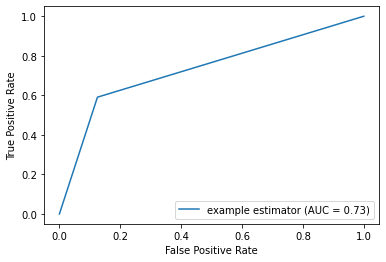

In [89]:
# Визуализируем полученный ROC_AUC
fpr3, tpr3, thresholds3 = roc_curve(y_test_under, y_pred_KNN)
roc_auc3 = auc(fpr3, tpr3)
display3 = RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3,
                                  estimator_name='example estimator')
display3.plot()

plt.show()

In [90]:
# Итоги по использованию KNN алгоритма - Алгоритм работает на нашем датасете. ROC_AUC вырос на 2.6% (с 70.2% в последней логистической регрессии до 72.8% в KNN)
# Из 4162 мошеннических банковских операций у нас около 2400 операциий предсказана правильно, что составляет уже 58% точности (в логистической с коррекциями было 68%). Как альтернатива - эта информация точно не помешает
# Предполагаю, что можно подобрать более оптимальный random undersampling, но ввиду простоты этого алгоритма и его слабой эффективности на практике, не будем это делать
# Попробуем использовать более продвинутые техники в нашей работе

# XGBoost

In [91]:
# Используем градиентный бустинг для решения нашей проблемы имбаланса в датасете (используем XGBoost)
# В качестве метрики используем AUC
# Вначале запустим модель с коробки и посмотрим на результаты
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train2, y_train2)

C:\Users\93ttt\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
y_test_pred1 = model_XGB.predict(X_test2)
auc_XGB1 = roc_auc_score(y_test2, y_test_pred1)
print("ROC AUC on test : ", auc_XGB1)

ROC AUC on test :  0.6106945764240516


In [93]:
cm_XGB = confusion_matrix(y_test2, y_test_pred1)
print(cm_XGB)

[[113782    193]
 [  3211    922]]


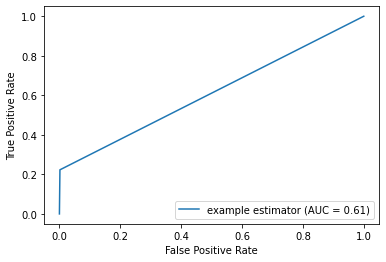

In [94]:
# ROC_AUC составил около 61%, что гораздо меньше чем в моделях раньше
# Сделаем визуализацию
fpr4, tpr4, thresholds4 = roc_curve(y_test2, y_test_pred1)
roc_auc4 = auc(fpr4, tpr4)
display4 = RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4,
                                  estimator_name='example estimator')
display4.plot()

plt.show()
# Визуально сразу можно увидеть уменьшение качества нашей модели

In [95]:
# Попробуем запустить XGBoost with parameters
# Оставим только метрику roc_auc (ранее я считал еще accuracy для дополнительной информации и изучения поведения моделей)
# Но, чтобы сохранить лучшую производительность нащей модели, оставим только самое нужное
# При запуске при помощи GridSearch если много комбинаций параметров, модель очень долго грузится. Попробую для понимания поиграться вручную с самыми важными параметрами
# Главная цель - побить хотя бы на 3-4% точность самой точной модели на данный момент - 72.8%
# Особое внимание обратим на параметр scale_pos_weight - это параметр, по смыслу очень схож с class_weight в логистической регрессии, SVM, деревьях

model_XGB_params = XGBClassifier(scale_pos_weight = 25, booster = "gbtree", max_depth = 15, subsample = 0.7, colsample_bylevel = 0.7, 
                                 learning_rate = 0.1, min_child_weight = 10, n_estimators = 125, random_state = 42)
model_XGB_params.fit(X_train2, y_train2)

C:\Users\93ttt\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:56:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=15, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
y_pred_XGB_params = model_XGB_params.predict(X_test2)

In [97]:
cm_XGB_params = confusion_matrix(y_test2, y_pred_XGB_params)
print(cm_XGB_params)
roc_auc_score(y_test2, y_pred_XGB_params)

[[98952 15023]
 [ 1344  2789]]


0.7715014387538877

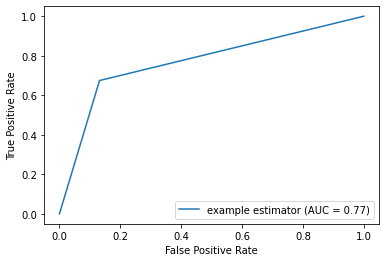

In [98]:
# Визуализируем наш AUC
fpr5, tpr5, thresholds5 = roc_curve(y_test2, y_pred_XGB_params)
roc_auc5 = auc(fpr5, tpr5)
display5 = RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5,
                                  estimator_name='example estimator')
display5.plot()

plt.show()

In [99]:
# Отлично, мы увеличили значение roc_auc на 4.4% (77.2%). Прогресс весьма не плохой.

# SMOTE

In [100]:
# Теперь воспользуемся SMOTE (Synthetic Minority Oversampling Technique) для балансировки нашей модели
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state = 42)
X_resampled, y_resampled = method.fit_resample(X_train2, y_train2)

In [105]:
# Вкратце о SMOTE
# Один из подходов к устранению несбалансированных наборов данных - это чрезмерная выборка класса меньшинства. 
# Самый простой подход включает дублирование примеров в классе меньшинства, хотя эти примеры не добавляют в модель никакой новой информации. 
# Вместо этого новые примеры могут быть синтезированы из существующих примеров. 
# Это тип увеличения данных для класса меньшинства и называется техникой синтетической передискретизации меньшинства, или сокращенно SMOTE .

In [106]:
# Теперь построим обычную логистическю регрессию (как в baseline) и сравним прирост качества нашей модели
model_SMOTE = LogisticRegression()
model_SMOTE.fit(X_resampled, y_resampled)

LogisticRegression()

In [107]:
y_pred_SMOTE = model_SMOTE.predict(X_test2)

In [108]:
cm_SMOTE = confusion_matrix(y_test2, y_pred_SMOTE)
print(cm_SMOTE)
roc_auc_score(y_test2, y_pred_SMOTE)

[[82012 31963]
 [ 1306  2827]]


0.7017840410220659

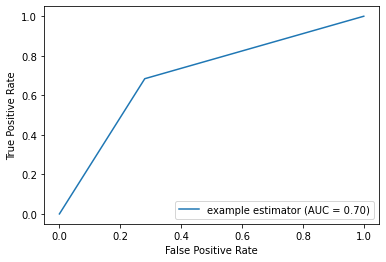

In [110]:
# Визуализируем AUC
fpr6, tpr6, thresholds6 = roc_curve(y_test2, y_pred_SMOTE)
roc_auc6 = auc(fpr6, tpr6)
display6 = RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6,
                                  estimator_name='example estimator')
display6.plot()

plt.show()

In [111]:
# AUC = 70.2% (в baseline было 55.8%). SMOTE хорошо улучшил качество нашей модели (наподобие как Undersampling в KNN ранее)
# Уверен, это не предел при помощи подборки параметров или использования других моделей со SMOTE можно еще значительно улучшить качество

# Additional - use parameter class_weight

In [113]:
# Также немного дополнение касательно параметра class_weight
# Вместо balanced как вариант, можно прописывать еще конркетные числа
# Ниже продемонстрирую это на примере обычной логистической регрессии, но также это можно использовать на моделях SVM, деревьях и тд

In [124]:
from sklearn.model_selection import StratifiedKFold
check_model = LogisticRegression(random_state = 42)

In [125]:
weights = np.linspace(0.0,0.99,100)

In [126]:
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

In [127]:
gridsearch = GridSearchCV(estimator= check_model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train2, y_train2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\93ttt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

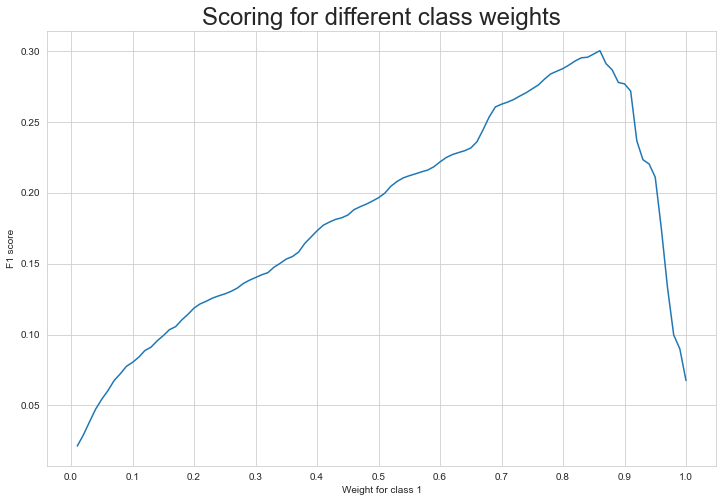

In [128]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [129]:
lr_check = LogisticRegression(solver='newton-cg', class_weight={0: 0.14, 1: 0.86})
lr_check.fit(X_train2, y_train2)

LogisticRegression(class_weight={0: 0.14, 1: 0.86}, solver='newton-cg')

In [130]:
y_pred_check = lr_check.predict(X_test2)

In [131]:
cm_check = confusion_matrix(y_test2, y_pred_check)
print(cm_check)
roc_auc_score(y_test2, y_pred_check)

[[112271   1704]
 [  3092   1041]]


0.6184622520750732

In [132]:
# В данном случае прирост у нас небольшой, так как мы запустили алгоритм с коробки без подбора других гипперпараметров, но в определенных ситуациях такой числовой подбор весов думаю может быть крайне полезен